In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [3]:
import pandas as pd

df = pd.read_excel("C://Users//Nitin//Downloads//Crude Oil Prices Daily.xlsx")
df


,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [4]:
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [5]:
df.tail()

,Date,Closing Value
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


In [6]:
df.shape

(8223, 2)

## Understanding the Data Structure


In [7]:
df.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


Explanation:
Count: The number of non-null values in each column.
Mean: The average of the closing values, and for dates, it represents a statistical midpoint (although dates are not typically summarized this way).
Min: The earliest date and lowest closing value.
25% (Q1): The first quartile (25th percentile), which gives insight into the lower 25% of the data.
Median (50%): The middle value (50th percentile) of the data.
75% (Q3): The third quartile (75th percentile), showing the value below which 75% of the data falls.
Max: The most recent date and highest closing value.
Std: Standard deviation of the closing values, indicating the spread of the data (unavailable for date fields).

In [8]:
df.columns

Index(['Date', 'Closing Value'], dtype='object')

In [9]:
df.nunique()


Date             8223
Closing Value    4611
dtype: int64

## Finding missing values

In [10]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB
None


## handaling the missing value


In [11]:
# Forward fill or backward fill missing data (common in time series)
df.fillna(method='ffill', inplace=True)  # Forward fill
df

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,74.19
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8223 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB
None


## Identifying Duplicates

In [13]:
# Identify duplicate rows
duplicates = df.duplicated()

In [14]:
# Display duplicate rows
print(df[duplicates])

Empty DataFrame
Columns: [Date, Closing Value]
Index: []


In [15]:
print(df.duplicated().sum())

0


## Data Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

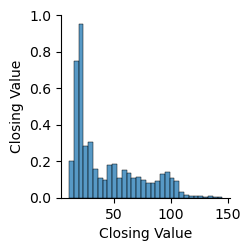

In [17]:
# Pairplot
sns.pairplot(df)
plt.show()


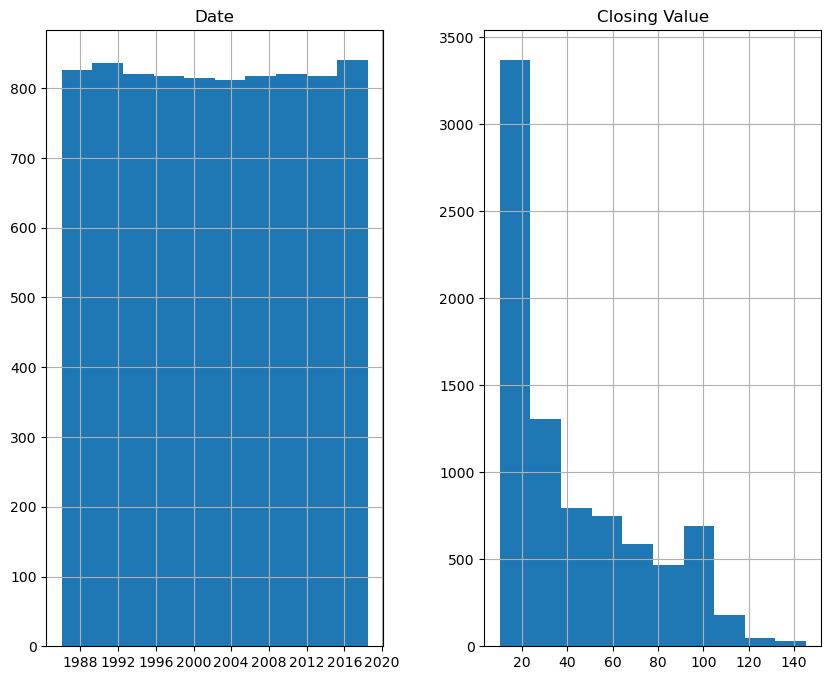

In [18]:
# Histogram
df.hist(figsize=(10, 8))
plt.show()

## Box plot using matplotlib

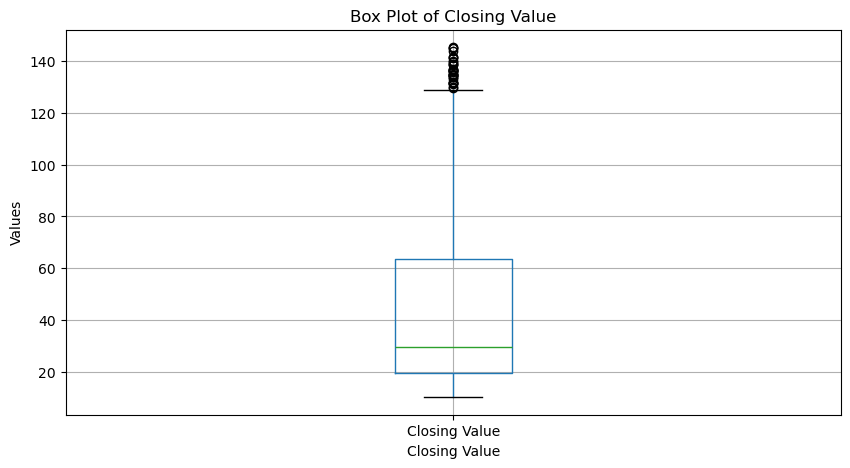

In [19]:
import matplotlib.pyplot as plt

# Box plot for Closing Value only, since Date is not numerical
plt.figure(figsize=(10, 5))
df[['Closing Value']].boxplot()  # Only plot numerical column(s)
plt.title('Box Plot of Closing Value')
plt.xlabel('Closing Value')
plt.ylabel('Values')
plt.show()

In [41]:
df

,ds,y
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,74.19
8220,2018-07-05,73.05
8221,2018-07-06,73.78


# ARIMA and SARIMA Model

ADF Statistic: -2.007612095956055
p-value: 0.28324546674775375
1%: -3.431149187783793
5%: -2.861893184836333
10%: -2.5669579955025976


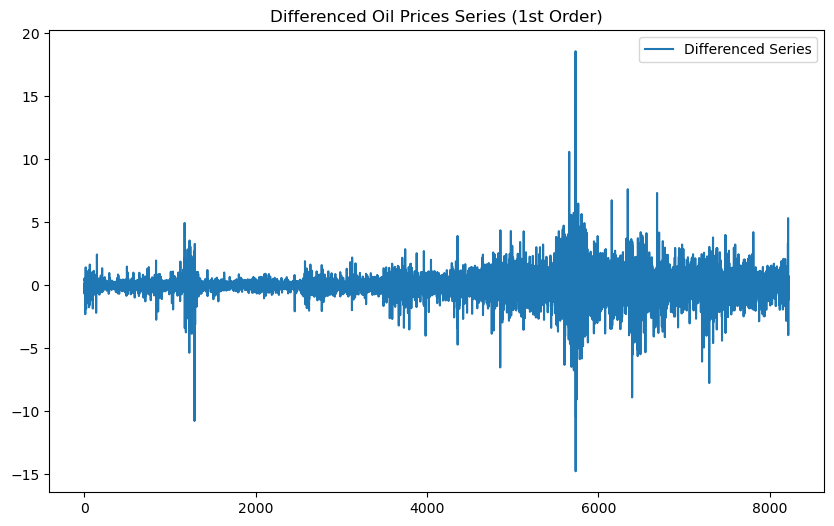

In [42]:
#Test for Stationarity (ADF Test)
# ADF Test to check stationarity
result = adfuller(df['y'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'{key}: {value}')

# If p-value > 0.05, the series is non-stationary, so apply differencing
if result[1] > 0.05:
    df['Differenced'] = df['y'].diff().dropna()
    plt.figure(figsize=(10,6))
    plt.plot(df['Differenced'], label='Differenced Series')
    plt.title('Differenced Oil Prices Series (1st Order)')
    plt.legend()
    plt.show()


# Plot ACF and PACF to Identify p and q

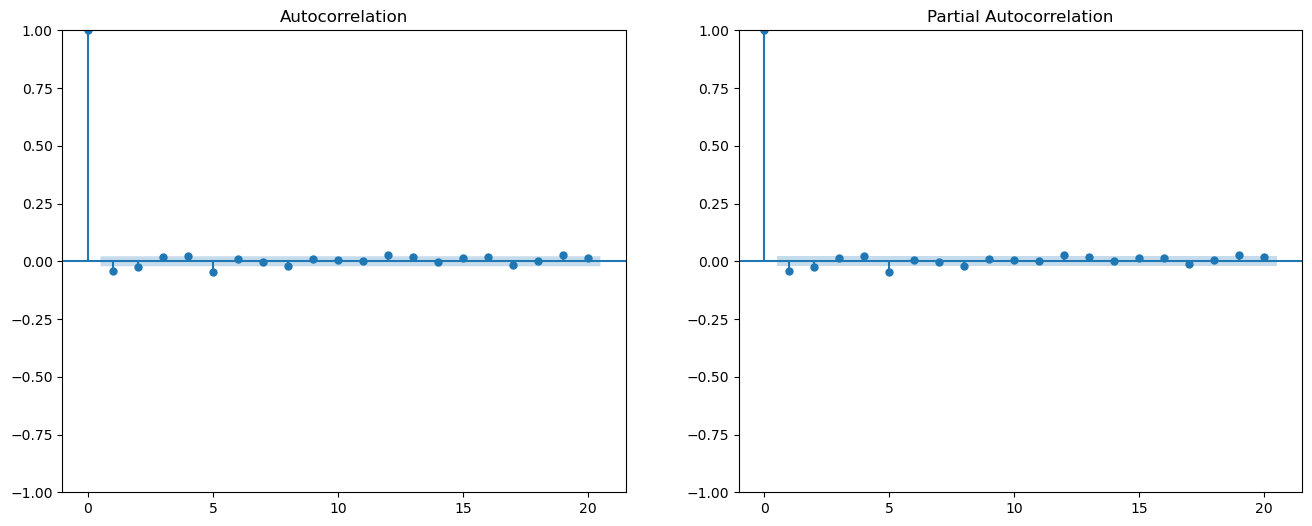

In [43]:
# Plot ACF and PACF to determine p and q
fig, ax = plt.subplots(1, 2, figsize=(16,6))
plot_acf(df['Differenced'].dropna(), lags=20, ax=ax[0])
plot_pacf(df['Differenced'].dropna(), lags=20, ax=ax[1])
plt.show()


# Fit ARIMA Model

In [44]:
# Define p, d, q based on ACF/PACF
p = 1  # Adjust based on PACF
d = 1  # First order differencing
q = 1  # Adjust based on ACF

# Fit ARIMA model
model = ARIMA(df['y'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8223
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12747.615
Date:                Sat, 28 Sep 2024   AIC                          25501.229
Time:                        05:30:28   BIC                          25522.273
Sample:                             0   HQIC                         25508.422
                               - 8223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2498      0.118      2.109      0.035       0.018       0.482
ma.L1         -0.2962      0.117     -2.537      0.011      -0.525      -0.067
sigma2         1.3008      0.006    211.059      0.0

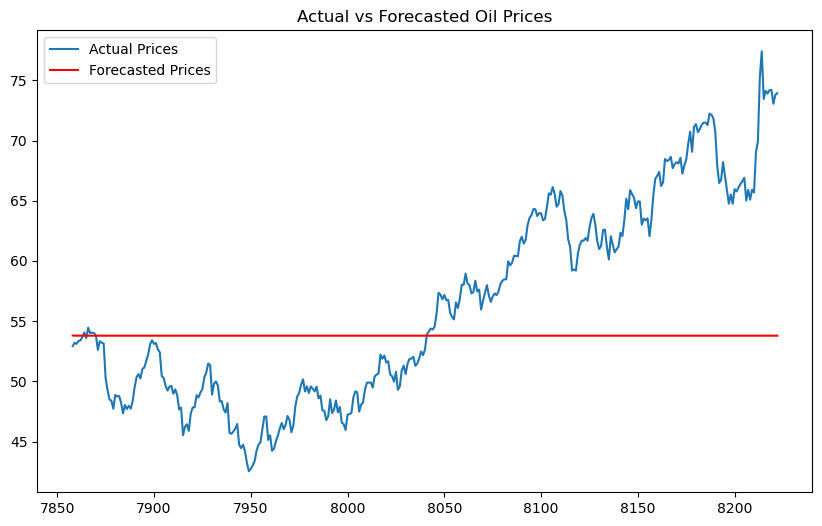

RMSE: 8.750595657526206
MSE: 76.5729243615165
R²: -0.09098473855046896


In [46]:
# Split data into training and testing sets (e.g., last 365 days as test data)
train = df['y'][:-365]
test = df['y'][-365:]

# Refit the ARIMA model on training data
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecast the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against actual values
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, forecast, label='Forecasted Prices', color='red')
plt.title('Actual vs Forecasted Oil Prices')
plt.legend()
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R²: {r2}')


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 7858
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -12260.487
Date:                            Sat, 28 Sep 2024   AIC                          24530.974
Time:                                    20:09:33   BIC                          24565.812
Sample:                                         0   HQIC                         24542.911
                                           - 7858                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2564      0.113      2.263      0.024       0.034       0.478
ma.L1         -0.3060      0.112   

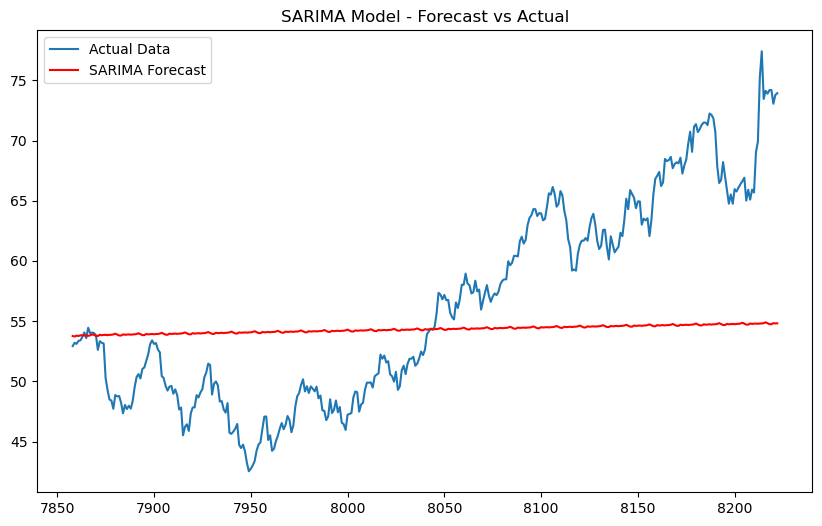

In [67]:
# Fit the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
s=12
p = 1
d = 1
q = 1
model = SARIMAX(train, order=(p, d, q), seasonal_order=(p, d, q, s))
model_fit = model.fit(disp=False)

# Summary of the model
print(model_fit.summary())

# Forecast on the test set (last 365 days)
forecast = model_fit.forecast(steps=len(test))

# Calculate performance metrics: RMSE, MSE, and R²
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plot the forecast vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Model - Forecast vs Actual')
plt.legend()
plt.show()

# fbprophet model

In [48]:
!pip install prophet


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [52]:
# Step 2: Split the data into training and testing sets
train_size = len(df) - 365  # Use the last 365 days as the test set
train1 = df[:train_size]
test1 = df[train_size:]

In [54]:
# Step 3: Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train1)


05:46:44 - cmdstanpy - INFO - Chain [1] start processing
05:46:57 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
# Step 4: Make future predictions
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)
forecast
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE, MSE, and R² for model evaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    return mse, rmse, r2
evaluate_model(y_test_actual, predictions)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1986-01-02,14.091931,-0.623073,26.163301,14.091931,14.091931,-0.819875,-0.819875,-0.819875,1.009294,1.009294,1.009294,-1.829169,-1.829169,-1.829169,0.0,0.0,0.0,13.272056
1,1986-01-03,14.095854,-0.001419,26.809595,14.095854,14.095854,-0.800442,-0.800442,-0.800442,0.978131,0.978131,0.978131,-1.778574,-1.778574,-1.778574,0.0,0.0,0.0,13.295412
2,1986-01-06,14.107623,-0.116349,26.913718,14.107623,14.107623,-0.717684,-0.717684,-0.717684,0.946850,0.946850,0.946850,-1.664534,-1.664534,-1.664534,0.0,0.0,0.0,13.389939
3,1986-01-07,14.111546,-0.575904,26.083281,14.111546,14.111546,-0.772240,-0.772240,-0.772240,0.868318,0.868318,0.868318,-1.640559,-1.640559,-1.640559,0.0,0.0,0.0,13.339306
4,1986-01-08,14.115469,-0.925053,26.020165,14.115469,14.115469,-0.739542,-0.739542,-0.739542,0.884480,0.884480,0.884480,-1.624021,-1.624021,-1.624021,0.0,0.0,0.0,13.375927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,2018-02-06,39.456014,23.759533,52.500825,36.647016,42.364386,-1.539893,-1.539893,-1.539893,0.868318,0.868318,0.868318,-2.408212,-2.408212,-2.408212,0.0,0.0,0.0,37.916121
8219,2018-02-07,39.431815,24.222408,51.668201,36.611525,42.354949,-1.509027,-1.509027,-1.509027,0.884480,0.884480,0.884480,-2.393507,-2.393507,-2.393507,0.0,0.0,0.0,37.922788
8220,2018-02-08,39.407616,23.468967,52.071601,36.569553,42.345512,-1.363931,-1.363931,-1.363931,1.009294,1.009294,1.009294,-2.373226,-2.373226,-2.373226,0.0,0.0,0.0,38.043685
8221,2018-02-09,39.383417,25.133691,53.078869,36.527581,42.336075,-1.369383,-1.369383,-1.369383,0.978131,0.978131,0.978131,-2.347515,-2.347515,-2.347515,0.0,0.0,0.0,38.014034


In [57]:
# Step 5: Extract the predicted values for the test set
predictions = forecast[['ds', 'yhat']].set_index('ds')
predictions = predictions[train_size:]  # Get the predictions for the last 365 days
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE, MSE, and R² for model evaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    return mse, rmse, r2
evaluate_model(y_test_actual, predictions)


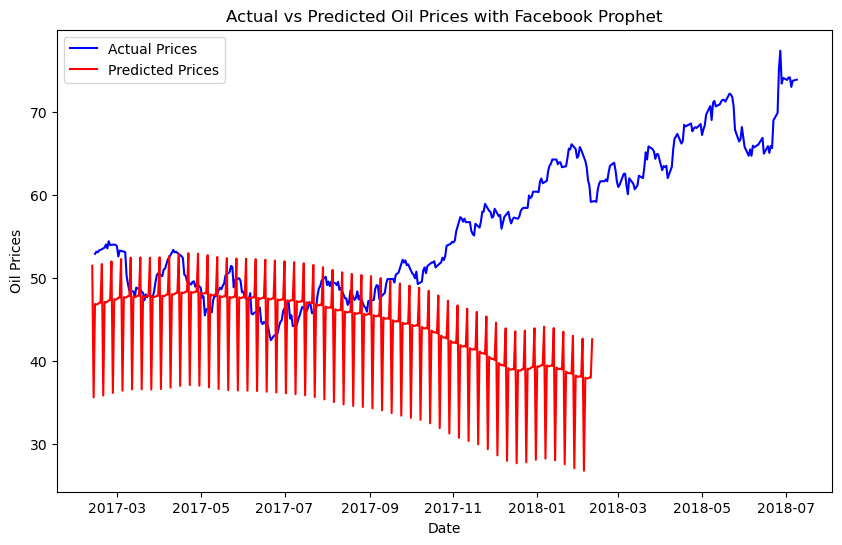

In [59]:
# Step 6: Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test1['ds'], test1['y'], label='Actual Prices', color='blue')
plt.plot(predictions.index, predictions['yhat'], label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Oil Prices with Facebook Prophet')
plt.xlabel('Date')
plt.ylabel('Oil Prices')
plt.legend()
plt.show()
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE, MSE, and R² for model evaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    return mse, rmse, r2
evaluate_model(y_test_actual, predictions)


In [60]:
# Step 7: Evaluate the model
# Calculate evaluation metrics
actual = test1['y'].values
predicted = predictions['yhat'].values

mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

print(f'Prophet RMSE: {rmse}')
print(f'Prophet MSE: {mse}')
print(f'Prophet R²: {r2}')
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE, MSE, and R² for model evaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    return mse, rmse, r2
evaluate_model(y_test_actual, predictions)


Prophet RMSE: 17.687655782953158
Prophet MSE: 312.8531670962363
Prophet R²: -3.457424521202051


# LSTM Model

C:\Users\Nitin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - loss: 0.0186
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 3.8277e-04
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 3.4520e-04
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 3.0033e-04
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 3.4083e-04
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 2.6242e-04
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 2.5722e-04
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 2.0026e-04
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 2.0397e-04
Epoch 10/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 1.9648e-04
Epoch 11/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 1.8188e-04
Epoch 12/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 1.9513e-04
Epoch 13/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 1.9866e-04
Epoch 14/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms

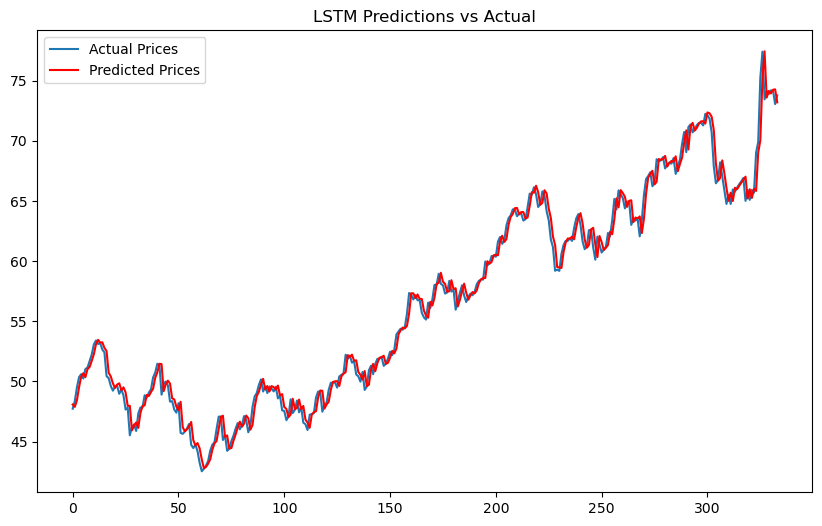

In [61]:

# Importing necessary modules for ARIMA and SARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# ARIMA Model
def train_arima(train, test):
    arima_model = ARIMA(train, order=(5,1,0))  # Example order, this can be tuned
    arima_result = arima_model.fit()
    predictions = arima_result.forecast(steps=len(test))
    return predictions

# SARIMA Model
def train_sarima(train, test):
    sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
    sarima_result = sarima_model.fit()
    predictions = sarima_result.forecast(steps=len(test))
    return predictions

# ARIMA model training and evaluation
arima_predictions = train_arima(train_data, test_data)
evaluate_model(test_data, arima_predictions)

# SARIMA model training and evaluation
sarima_predictions = train_sarima(train_data, test_data)
evaluate_model(test_data, sarima_predictions)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['y']])

# Split the data into train and test sets
train_size = len(scaled_data) - 365  # All but the last 365 days for training
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]  # Last 365 days for testing

# Convert the dataset into a format suitable for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Use a time step of 30 (e.g., predicting the next value based on the past 30 days)
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] as required by LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Now you can build and train your LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=100)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions back to original values
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MSE, and R²
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, predictions)

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Optional: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('LSTM Predictions vs Actual')
plt.legend()
plt.show()

# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE, MSE, and R² for model evaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    return mse, rmse, r2
evaluate_model(y_test_actual, predictions)

# Importing necessary modules for Prophet
from fbprophet import Prophet

# Prepare data for Prophet model
df_prophet = df[['Date', 'Closing Value']].rename(columns={'Date': 'ds', 'Closing Value': 'y'})

# Prophet Model
def train_prophet(train, test):
    prophet_model = Prophet()
    prophet_model.fit(train)
    future = prophet_model.make_future_dataframe(periods=len(test))
    forecast = prophet_model.predict(future)
    predictions = forecast['yhat'][-len(test):].values
    return predictions

# Prophet model training and evaluation
prophet_train = df_prophet.iloc[:train_size]
prophet_test = df_prophet.iloc[train_size:]
prophet_predictions = train_prophet(prophet_train, prophet_test)
evaluate_model(prophet_test['y'], prophet_predictions)
